# Regression

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


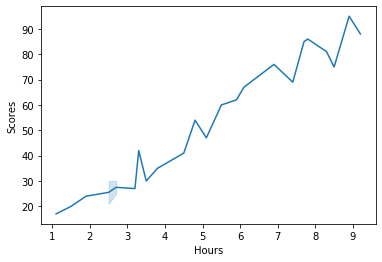

In [8]:
sns.lineplot(x="Hours",y="Scores",data=data)

In [9]:
X=np.array(data["Hours"]).reshape(-1,1)
y=np.array(data["Scores"])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(regression.coef_)

[9.91065648]


In [15]:
print(regression.intercept_)

2.018160041434683


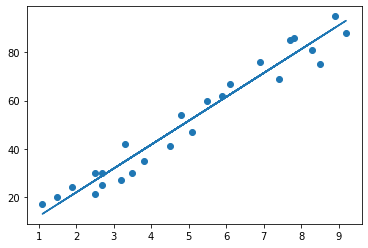

In [16]:
linefit=regression.coef_*X+regression.intercept_
plt.scatter(X,y)
plt.plot(X,linefit)
plt.show()

In [17]:
y_prediction=regression.predict(X_test)
df=pd.DataFrame({"Actual":y_test,"Predicted":y_prediction})
print(df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


In [18]:
hour=[[9.25]]
a=regression.predict(hour)
print("If study hour is 9.25, then percentage of mark is",a)

If study hour is 9.25, then percentage of mark is [93.69173249]


In [19]:
accuracy=regression.score(X_test,y_test)
print("The accuracy of applied model is",accuracy*100)

The accuracy of applied model is 94.54906892105356


metrics

In [20]:
from sklearn import metrics
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_prediction))
print("Mean squared error:",metrics.mean_squared_error(y_test,y_prediction))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

Mean absolute error: 4.183859899002975
Mean squared error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
